## Importações

In [2]:
#!pip install matplotlib
# !pip install mysql-connector-python
# !pip install seaborn 
# !pip install plotly==5.23.0

In [3]:
import mysql.connector
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import numpy as np

## Conexão com o banco 

In [4]:
conexao = mysql.connector.connect(
    host= 'ALH001-DEV',
    user= 'fgv',
    password= 'rY44ob7N',
    database= 'apresentacao2024_recursos_dis',
    charset='utf8'
)

cursor = conexao.cursor()

## Extração de Dados

### 1- Total de Candidatos

In [5]:
comando = "SELECT COUNT(codigo) as 'Total Candidatos' FROM cadastro"
cursor.execute(comando)
totalCandidatos = cursor.fetchall()

colunasTotalCand = [desc[0] for desc in cursor.description]
totalCandidatos = pd.DataFrame(totalCandidatos, columns=colunasTotalCand)

display(totalCandidatos)

,Total Candidatos
0,563


### 2- Total de Recursos

In [6]:
comando = "SELECT COUNT(protocolo) as 'Total Recursos' FROM recursos"
cursor.execute(comando)
totalRecursos = cursor.fetchall()

colunasTotalRec = [desc[0] for desc in cursor.description]
totalRecursos = pd.DataFrame(totalRecursos, columns=colunasTotalRec)

display(totalRecursos)

,Total Recursos
0,319


### 3- Total de Recursos por Cargo(Disciplina)

##### 3.1) Todos os cargos 

In [7]:
comando = "SELECT CARR as Carreira FROM carreira"
cursor.execute(comando)
totalCarreira = cursor.fetchall()

colunasTotalCarr = [desc[0] for desc in cursor.description]
totalCarreira = pd.DataFrame(totalCarreira, columns=colunasTotalCarr)

num_carreiras = totalCarreira.shape[0] #Total de registros
nomeCarreiras = totalCarreira['Carreira'].tolist() #Lista com o conteudo dos registros

display(totalCarreira)
print(f'Total de Carreiras: {num_carreiras}')
print(f'Nome das Carreiras: {nomeCarreiras}')

,Carreira
0,Analista Administrativo - Administrativa
1,Analista Administrativo - Contabilidade
2,Analista Administrativo - Tecnologia de Inform...
3,Analista em Infraestrutura de Transportes - En...


Total de Carreiras: 4
Nome das Carreiras: ['Analista Administrativo - Administrativa', 'Analista Administrativo - Contabilidade', 'Analista Administrativo - Tecnologia de Informação', 'Analista em Infraestrutura de Transportes - Engenharia Civil/ Engenharia de Transportes']


##### 3.2) Total de Recurso por cargo e disciplina

In [8]:
comando = "SELECT rec.questao as Questão, rec.sigla as Sigla, car.CARR as 'Cargo', q.QUESTAO_NOME as 'Questão', COUNT(rec.protocolo) as 'Total Recursos' FROM apresentacao2024_recursos_dis.recursos as rec INNER JOIN apresentacao2024_recursos_dis.questao as q ON rec.questao = q.IDQUESTAO INNER JOIN apresentacao2024_recursos_dis.carreira as car ON rec.sigla = car.SIGLA GROUP BY rec.questao;"
cursor.execute(comando)
totalRecusosCargo = cursor.fetchall()

colunasTotalRecCargo = [desc[0] for desc in cursor.description]
totalRecusosCargo = pd.DataFrame(totalRecusosCargo, columns=colunasTotalRecCargo)

somaRecCarr = pd.DataFrame(totalRecusosCargo.groupby('Cargo')['Total Recursos'].sum().reset_index()) #Soma de recurso por cargo

display(totalRecusosCargo)
display(somaRecCarr)

,Questão,Sigla,Cargo,Questão,Total Recursos
0,A01,A,Analista Administrativo - Administrativa,Questão 01,15
1,A02,A,Analista Administrativo - Administrativa,Questão 02,33
2,A03,A,Analista Administrativo - Administrativa,Redação,41
3,B01,B,Analista Administrativo - Contabilidade,Questão 01,7
4,B02,B,Analista Administrativo - Contabilidade,Questão 02,9
5,B03,B,Analista Administrativo - Contabilidade,Redação,9
6,C01,C,Analista Administrativo - Tecnologia de Inform...,Questão 01,4
7,C02,C,Analista Administrativo - Tecnologia de Inform...,Questão 02,3
8,C03,C,Analista Administrativo - Tecnologia de Inform...,Redação,2
9,D01,D,Analista em Infraestrutura de Transportes - En...,Questão 01,85


,Cargo,Total Recursos
0,Analista Administrativo - Administrativa,89
1,Analista Administrativo - Contabilidade,25
2,Analista Administrativo - Tecnologia de Inform...,9
3,Analista em Infraestrutura de Transportes - En...,196


### 4- Total de Acesso ao Sistema

In [9]:
comando = "SELECT DATE(dtInclusao) as Data, COUNT(*) as 'Total de Acessos' FROM recursos GROUP BY DATE(dtInclusao) ORDER BY DATE(dtInclusao);"
cursor.execute(comando)
resultado = cursor.fetchall()

colunasTotalAcesso = [desc[0] for desc in cursor.description]
acessoSystem = pd.DataFrame(resultado, columns=colunasTotalAcesso)

# somaAcesso = pd.DataFrame(acessoSystem.groupby('Data')['Total de Acessos'].sum().reset_index()) #Soma de recurso por cargo

display(acessoSystem)
# display(somaAcesso)

,Data,Total de Acessos
0,2024-05-10,72
1,2024-05-11,19
2,2024-05-12,24
3,2024-05-13,119
4,2024-05-14,85


### 5- Total de Recursos Respondidos por Cargo

#### 5.1) Total de respostas por cargo

In [10]:
comando = "SELECT rec.sigla as Sigla, car.CARR as 'Cargo', COUNT(rec.protocolo) as 'Total Recursos',  COUNT(CASE WHEN rec.respondido = 1 THEN rec.respondido END) AS 'Total Respostas' FROM apresentacao2024_recursos_dis.recursos as rec INNER JOIN apresentacao2024_recursos_dis.questao as q ON rec.questao = q.IDQUESTAO INNER JOIN apresentacao2024_recursos_dis.carreira as car ON rec.sigla = car.SIGLA GROUP BY car.CARR;"

cursor.execute(comando)
totalRespostaCargo = cursor.fetchall()

colunasTotalAcesso = [desc[0] for desc in cursor.description]
totalRespostaCargo = pd.DataFrame(totalRespostaCargo, columns=colunasTotalAcesso)

# somaRespCarr = pd.DataFrame(totalRespostaCargo.groupby('Cargo')['Total Respostas'].sum().reset_index()) #Soma de recurso por cargo

display(totalRespostaCargo)
#display(somaRespCarr)

,Sigla,Cargo,Total Recursos,Total Respostas
0,A,Analista Administrativo - Administrativa,89,83
1,B,Analista Administrativo - Contabilidade,25,22
2,C,Analista Administrativo - Tecnologia de Inform...,9,9
3,D,Analista em Infraestrutura de Transportes - En...,196,188


#### 5.2) Total de questões por cargo

In [11]:
comando = "SELECT carr.CARR AS 'Cargo', q.SIGLA AS 'Sigla',  COUNT(q.QUESTAO) AS 'Total Questões' FROM questao AS q INNER JOIN carreira AS carr ON q.sigla = carr.SIGLA GROUP BY q.SIGLA;"

cursor.execute(comando)
totalQuestCargo = cursor.fetchall()

colunasTotalAcesso = [desc[0] for desc in cursor.description]
totalQuestCargo = pd.DataFrame(totalQuestCargo, columns=colunasTotalAcesso)

somaQuestCarr = pd.DataFrame(totalQuestCargo.groupby('Cargo')['Total Questões'].sum().reset_index()) #Soma de recurso por cargo

display(totalQuestCargo)
display(somaQuestCarr)

,Cargo,Sigla,Total Questões
0,Analista Administrativo - Administrativa,A,3
1,Analista Administrativo - Contabilidade,B,3
2,Analista Administrativo - Tecnologia de Inform...,C,3
3,Analista em Infraestrutura de Transportes - En...,D,3


,Cargo,Total Questões
0,Analista Administrativo - Administrativa,3
1,Analista Administrativo - Contabilidade,3
2,Analista Administrativo - Tecnologia de Inform...,3
3,Analista em Infraestrutura de Transportes - En...,3


## Criação dos gráficos

#### 3- Total de Recursos por Cargo(Disciplina)

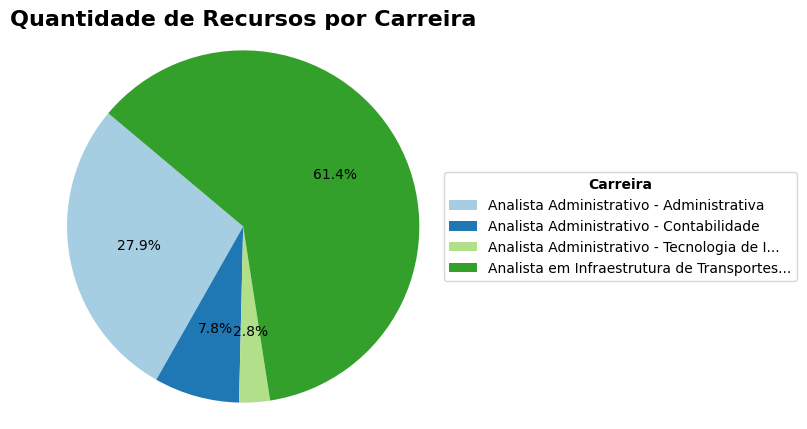

In [12]:
carreiras = somaRecCarr['Cargo'].tolist()
total_recursos = somaRecCarr['Total Recursos'].tolist()

# Função para truncar legendas
def truncate_label(label, max_length=41):
    if len(label) > max_length:
        return label[:max_length] + '...'
    else:
        return label

# Truncando as legendas
truncated_labels = [truncate_label(label) for label in carreiras]

plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    total_recursos,
    autopct='%.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 10}
)

plt.legend(
    labels=truncated_labels,
    title="Carreira",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
     title_fontproperties={'weight': 'bold', 'size': '10'}
)

plt.title('Quantidade de Recursos por Carreira', fontsize=16, loc='center', fontweight='bold')
plt.axis('equal')
plt.show()

### 4- Total de Acesso ao sistema

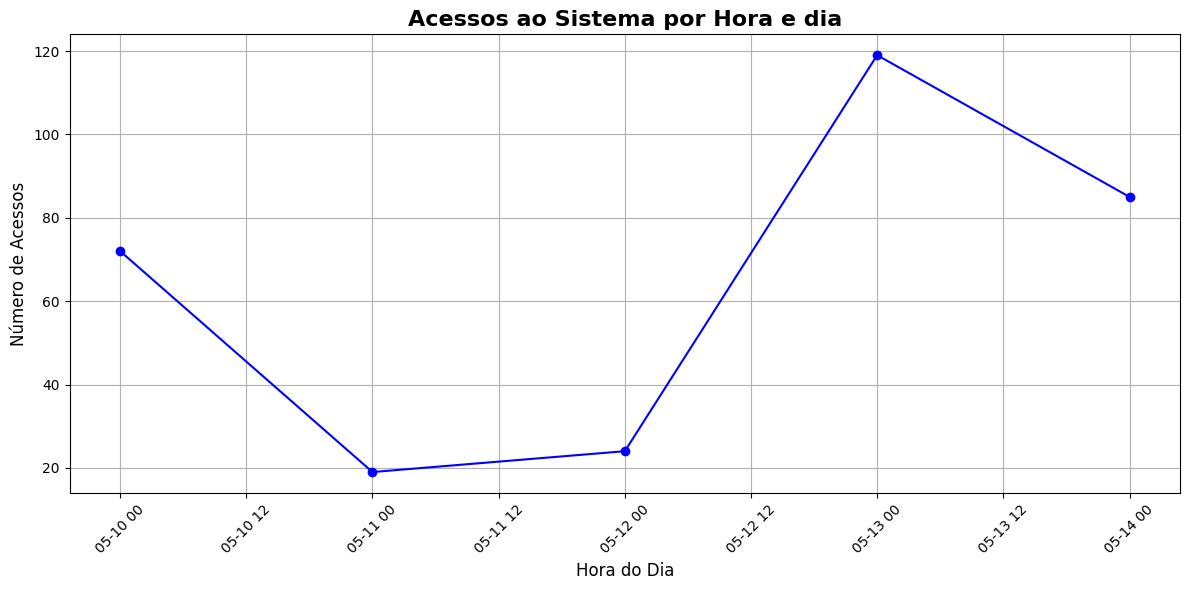

In [13]:
# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(acessoSystem['Data'], acessoSystem['Total de Acessos'], marker='o', linestyle='-', color='b')

#Formatação do gráfico
plt.title('Acessos ao Sistema por Hora e dia', fontsize=16, fontweight='bold')
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Número de Acessos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


### 5- Total de resposta por professor

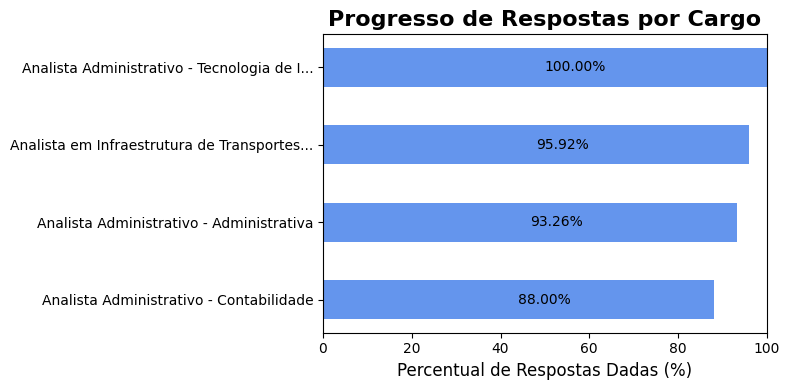

In [14]:
# Calcular o percentual de respostas por cargo
dados_unidos = totalRespostaCargo.copy()
dados_unidos['Percentual Respostas'] = (dados_unidos['Total Respostas'] / dados_unidos['Total Recursos']) * 100

# Ordenar os dados pelo percentual de respostas
dados_unidos = dados_unidos.sort_values(by='Percentual Respostas', ascending=True)

# Função para truncar legendas
def truncate_label(label, max_length=41):
    if len(label) > max_length:
        return label[:max_length] + '...'
    else:
        return label

# Aplicar a truncagem nos nomes dos cargos
dados_unidos['Cargo'] = dados_unidos['Cargo'].apply(lambda x: truncate_label(x, max_length=41))

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 4))

plt.barh(dados_unidos['Cargo'], dados_unidos['Percentual Respostas'], color='#6495ED', height=0.5)

# Adicionando rótulos e título
plt.xlim(0, 100)
plt.xlabel('Percentual de Respostas Dadas (%)', fontsize=12)
plt.title('Progresso de Respostas por Cargo', fontsize=16, fontweight='bold')

# Mostrar o valor do percentual no gráfico
for index, value in enumerate(dados_unidos['Percentual Respostas']):
    plt.text(value / 2, index, f'{value:.2f}%', va='center', fontsize=10, color='black', ha='left')

plt.tight_layout()
plt.show()

In [15]:
cursor.close()
conexao.close()